In [361]:
import os
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import pandas as pd
%load_ext autoreload
%autoreload 2
import pickle

from DLC_for_WBFM.utils.feature_detection.utils_keypoint_matching import *
from DLC_for_WBFM.utils.feature_detection.utils_tracklets import consolidate_tracklets

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
which_suffix = 'prealigned'

fname = f'clust_df_dat_{which_suffix}.pickle'
with open(fname, 'rb') as f:
    clust_df = pickle.load(f)
    
fname = f'frame_dat_{which_suffix}.pickle'
with open(fname, 'rb') as f:
    all_frames = pickle.load(f)

## Do everything in 100 frame chunks

In [359]:
all_window_matches, all_window_dist = [], []
all_starts = list(range(0,401,100))
# all_starts = list(range(0,2,50))
window_length = 99

In [360]:
for start in all_starts:
    kp_df, tracklet_df = separate_keypoints_and_tracklets(clust_df, start, window_length)
    all_tracklet_features = calc_all_tracklet_features(kp_df, tracklet_df, start, window_length)
    all_matches, all_dist = match_tracklets_using_features(all_tracklet_features, tracklet_df=tracklet_df)
    all_window_matches.append(all_matches)
    all_window_dist.append(all_dist)

  1%|▍                                                                           | 7/1092 [00:00<00:19, 55.98it/s]

Calculating features for all tracklets


  0%|                                                                             | 1/899 [00:00<01:41,  8.88it/s]

Calculating features for all tracklets


  0%|                                                                                     | 0/789 [00:00<?, ?it/s]

Calculating features for all tracklets


  0%|▏                                                                            | 2/779 [00:00<00:45, 17.25it/s]

Calculating features for all tracklets


  0%|                                                                                     | 0/695 [00:00<?, ?it/s]

Calculating features for all tracklets


100%|███████████████████████████████████████████████████████████████████████████| 695/695 [01:01<00:00, 11.30it/s]


In [363]:
# NEW: bipartite matching for the distances produced
all_bp_matches, all_candidates = [], []
for i, start in enumerate(all_starts):
    kp_df, tracklet_df = separate_keypoints_and_tracklets(clust_df, start, window_length)
    this_mat = distance_to_similarity_matrix(all_window_dist[i])
    bp, c = stepwise_bipartite_match(tracklet_df, this_mat, start, window_length)
    
    all_bp_matches.extend(bp)
    all_candidates.extend(c)

In [184]:
# Convert the local matches to the indices of the global dataframe
# global_matches = {}
# for start, this_match in zip(all_starts, all_window_matches):
#     kp_df, tracklet_df = separate_keypoints_and_tracklets(clust_df, start, window_length)
#     for k, val in this_match.items():
#         i0, i1 = tracklet_df['clust_ind'].iloc[list(k)]
#         if i1 > i0:
#             global_matches[(i0, i1)] = val

In [364]:
# stitched_df = consolidate_tracklets(clust_df, global_matches.keys(), verbose=1)
stitched_df = consolidate_tracklets(clust_df, all_bp_matches, verbose=1)


Extended and dropped 1973/5835 rows


In [365]:
# Did the consolidation function actually work?
k = list(global_matches.keys())[1]
print(k)
print("Original track0: ", clust_df['slice_ind'].iloc[k[0]])
print("Original track1: ",clust_df['slice_ind'].iloc[k[1]])
print("Stitched track: ",stitched_df['slice_ind'].iloc[k[0]])

(14, 970)
Original track0:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
Original track1:  [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
Stitched track:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]


In [366]:
which_suffix = 'prealigned-stitched100'

fname = f'clust_df_dat_{which_suffix}.pickle'
with open(fname, 'wb') as f:
    pickle.dump(stitched_df, f)

# Do once more

In [376]:
all_window_matches, all_window_dist = [], []
all_starts = list(range(0,301,250))
window_length = 249

In [377]:
for start in all_starts:
    kp_df, tracklet_df = separate_keypoints_and_tracklets(stitched_df, start, window_length)
    all_tracklet_features = calc_all_tracklet_features(kp_df, tracklet_df, start, window_length)
    all_matches, all_dist = match_tracklets_using_features(all_tracklet_features, tracklet_df=tracklet_df)
    all_window_matches.append(all_matches)
    all_window_dist.append(all_dist)

  0%|▏                                                                           | 3/1029 [00:00<00:53, 19.30it/s]

Warning, few keypoints (8) detected
Calculating features for all tracklets


100%|█████████████████████████████████████████████████████████████████████████| 1029/1029 [01:50<00:00,  9.33it/s]
c:\users\charles.fieseler\documents\current_work\dlc_for_wbfm\DLC_for_WBFM\utils\feature_detection\utils_keypoint_matching.py:205: RuntimeWarning: All-NaN slice encountered
  dist = np.nanmin(r)
  0%|                                                                                    | 0/1124 [00:00<?, ?it/s]

Calculating features for all tracklets


100%|█████████████████████████████████████████████████████████████████████████| 1124/1124 [02:57<00:00,  6.32it/s]


In [379]:
# NEW: bipartite matching for the distances produced
all_bp_matches, all_candidates = [], []
for i, start in enumerate(all_starts):
    kp_df, tracklet_df = separate_keypoints_and_tracklets(stitched_df, start, window_length)
    this_mat = distance_to_similarity_matrix(all_window_dist[i])
    bp, c = stepwise_bipartite_match(tracklet_df, this_mat, start, window_length)
    
    all_bp_matches.extend(bp)
    all_candidates.extend(c)

Warning, few keypoints (8) detected


In [380]:
stitched_df2 = consolidate_tracklets(stitched_df, all_bp_matches, verbose=1)

Extended and dropped 912/3862 rows


In [381]:
which_suffix = 'prealigned-stitched100-2'

fname = f'clust_df_dat_{which_suffix}.pickle'
with open(fname, 'wb') as f:
    pickle.dump(stitched_df, f)

# Compare stitched with pre-stitched

In [205]:
from DLC_for_WBFM.utils.feature_detection.visualization_tracks import hist_of_tracklet_lens

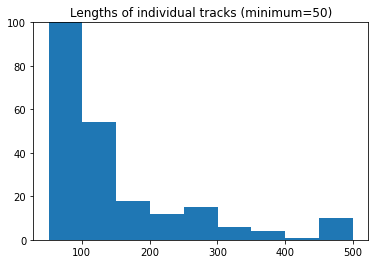

In [367]:
all_len0 = hist_of_tracklet_lens(clust_df)

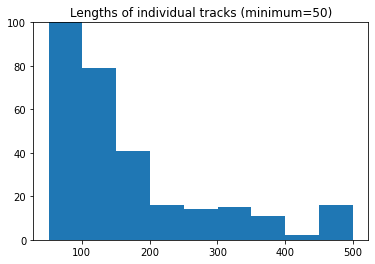

In [368]:
all_len1 = hist_of_tracklet_lens(stitched_df)

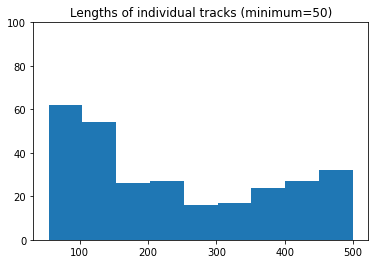

In [382]:
all_len2 = hist_of_tracklet_lens(stitched_df2)

In [369]:
# plt.plot(np.cumsum(all_len0), label='original')
# plt.plot(np.cumsum(all_len1), label='stitched')
# plt.legend()
print(sum(all_len0), sum(all_len1))
print(len(all_len0), len(all_len1))

77705 77705
5835 3862


In [307]:
df = stitched_df
for _, row in df.iterrows():
#     print(np.diff(row['slice_ind']))
    if not all(np.diff(row['slice_ind'])>0):
        print(f"Failed on row {i}; {np.diff(row['slice_ind'])}")
        print(row['slice_ind'])
        break
else:
    print("All tracklets are monotonically increasing")
#     assert all(np.diff(stitched_df.loc[i,'slice_ind'])>0)

Failed on row 240; [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1 -3  1  1  1  1  1  1  1  1
  1  1]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]


In [258]:
# What were the matches of the non-monotonic track above?
clust_df

False

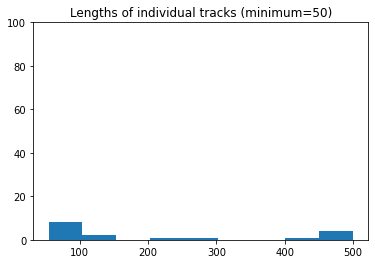

In [210]:
hist_of_tracklet_lens(stitched_df2)

In [ ]:
from collections import defaultdict
all_num_tracks = defaultdict(int)
min_len = 20
window_len = 20
# for row in clust_df['slice_ind']:
#     if len(row) < min_len:
#         continue
#     for ind in row:
#         if row[0]<:
#             break
#         all_num_tracks[ind] += 1

num_frames = 500
num_windows = num_frames - window_len
all_num = np.zeros(num_frames)
for k, val in all_num_tracks.items():
    all_num[k] = val

# Debugging stitching

In [308]:
dummy_opt = {'i0_xyz':[0,0,0],
                    'i1_xyz':[1,0,0],
                    'i1_prob':[0.9],
                    'this_point_cloud_offset':2,
                    'next_point_cloud_offset':5,
                    'i1_global':10}

next_ind, t0 = create_new_track(i0=0, i1=1,
                                which_slice=0,
                                next_clust_ind=1,
                                **dummy_opt)
next_ind, t1 = create_new_track(i0=2, i1=3,
                                which_slice=2,
                                next_clust_ind=next_ind,
                                **dummy_opt)
next_ind, t2 = create_new_track(i0=5, i1=6,
                                which_slice=5,
                                next_clust_ind=next_ind,
                                **dummy_opt)
next_ind, t3 = create_new_track(i0=9, i1=10,
                                which_slice=5,
                                next_clust_ind=next_ind,
                                **dummy_opt)
matches = [[0,1], [1,2], [1,3]]

In [312]:
df_test = t0.append(t1, ignore_index=True).append(t2, ignore_index=True).append(t3, ignore_index=True)
df_test

,clust_ind,all_ind_local,all_ind_global,all_xyz,all_prob,slice_ind,extended_this_slice,not_finished
0,1,"[0, 1]","[2, 10]","[[0, 0, 0], [1, 0, 0]]","[[0.9], [0.9]]","[0, 1]",True,True
1,2,"[2, 3]","[4, 10]","[[0, 0, 0], [1, 0, 0]]",[[0.9]],"[2, 3]",True,True
2,3,"[5, 6]","[7, 10]","[[0, 0, 0], [1, 0, 0]]",[[0.9]],"[5, 6]",True,True
3,4,"[9, 10]","[11, 10]","[[0, 0, 0], [1, 0, 0]]",[[0.9]],"[5, 6]",True,True


In [313]:
# df_test.loc[1]

In [314]:
out = consolidate_tracklets(df_test, matches)
out

,clust_ind,all_ind_local,all_ind_global,all_xyz,all_prob,slice_ind,extended_this_slice,not_finished
0,1,"[0, 1, 2, 3, 5, 6, 9, 10]","[2, 10, 4, 10, 7, 10, 11, 10]","[[0, 0, 0], [1, 0, 0], [0, 0, 0], [1, 0, 0], [...","[[0.9], [0.9], [0.9], [0.9], [0.9]]","[0, 1, 2, 3, 5, 6, 5, 6]",True,True


In [298]:
out['slice_ind'].loc[0]==[0, 1, 2, 3]

True

# Fix translation from distance to match

In [187]:
# Only retain the closest N for each row


<IPython.core.display.Javascript object>


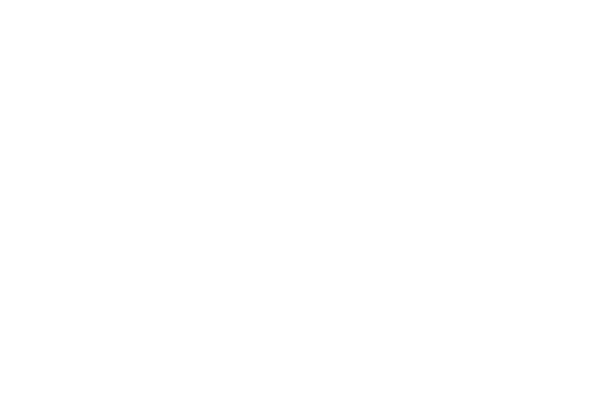

In [188]:
d = all_window_dist[0].copy()
%matplotlib notebook
plt.imshow(d)


In [189]:
from ipywidgets import interact
%matplotlib inline
def f(i):
    plt.plot(d[i,:], d[:,i], 'o')
    plt.xlabel('row distance')
    plt.ylabel('column distance')
    
    plt.xlim([0,10])
    plt.ylim([0,10])

interact(f, i=(0,len(d)-1))

interactive(children=(IntSlider(value=545, description='i', max=1091), Output()), _dom_classes=('widget-intera…

<function __main__.f(i)>

## Try step-wise bipartite matching

In [351]:
# all_bp_matches

In [352]:
# Build similarity matrix from distance matrix
# import networkx as nx
d = all_window_dist[0].copy()
max_dist = 10.0
d[d>max_dist] = np.nan
d = d + d.T # If the other direction is nan, now both are
d = 1.0/d

In [354]:
kp_df, tracklet_df = separate_keypoints_and_tracklets(clust_df, start, window_length)
all_bp_matches, all_candidates = stepwise_bipartite_match(tracklet_df, d, start, window_length)
# all_candidates

In [355]:
stitched_df = consolidate_tracklets(tracklet_df, all_bp_matches, verbose=1)
# kp_df, tracklet_df = separate_keypoints_and_tracklets(clust_df, start, window_length)
# get_sink_source_matches(tracklet_df, d, 51)
# i = 15
# m = all_bp_matches[i]
# clust_df.loc[m[0]], clust_df.loc[m[1]]

Extended and dropped 580/1024 rows


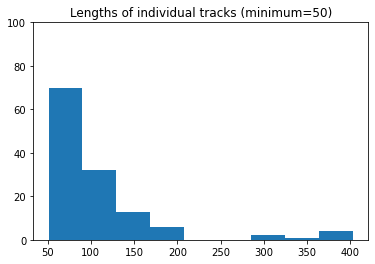

In [356]:
from DLC_for_WBFM.utils.feature_detection.visualization_tracks import hist_of_tracklet_lens

all_len = hist_of_tracklet_lens(stitched_df);

In [357]:
# [print(m) for m in all_bp_matches if m[0]==10]

[10, 1308]


[None]

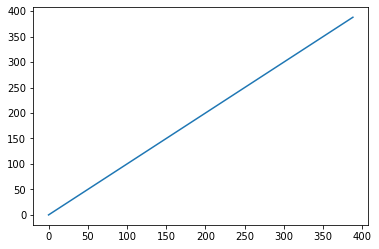

In [358]:
%matplotlib inline
plt.plot(stitched_df['slice_ind'].iloc[2])

In [348]:
tracklet_df

,clust_ind,all_ind_local,all_ind_global,all_xyz,all_prob,slice_ind,extended_this_slice,not_finished
4,4,"[7, 16, 7, 8, 15, 21, 63, 115, 97, 120, 210, 8...","[7, 164, 327, 507, 685, 850, 1022, 1245, 1395,...","[[7.0, 407.4144025530134, 240.54870823451452],...","[0.3333333333333333, 0.7142857142857143, 0.666...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False,False
9,9,"[12, 22, 25, 54, 35, 61, 83, 140, 48, 91, 191,...","[12, 170, 345, 553, 705, 890, 1042, 1270, 1346...","[[8.5, 413.4557571411133, 254.60799407958984],...","[0.45454545454545453, 0.6666666666666666, 0.5,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False,False
10,10,"[13, 23, 10, 52, 40, 62, 81, 136, 50, 23, 102,...","[13, 171, 330, 551, 710, 891, 1040, 1266, 1348...","[[12.5, 476.6576461791992, 209.7729835510254],...","[0.6666666666666666, 0.8048780487804879, 0.687...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False,False
17,17,"[20, 56, 43, 56, 37, 97, 113, 122, 37, 83, 133...","[20, 204, 363, 555, 707, 926, 1072, 1252, 1335...","[[14.0, 418.69657076322113, 264.6794668344351]...","[0.5777777777777777, 0.5813953488372093, 0.425...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False,False
19,19,"[22, 25, 1, 44, 42, 54, 85, 130, 35, 90, 200, ...","[22, 173, 321, 543, 712, 883, 1044, 1260, 1333...","[[12.0, 375.0103285047743, 237.17278883192273]...","[0.7222222222222222, 0.9090909090909091, 0.666...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False,False
...,...,...,...,...,...,...,...,...
2403,2403,"[5, 17, 16, 10, 7, 3, 0, 1, 3, 4, 6, 0, 16, 16...","[22585, 22752, 22903, 23048, 23189, 23332, 234...","[[6.0, 440.7947285970052, 134.62530008951822],...","[0.8666666666666667, 0.9354838709677419, 0.838...","[146, 147, 148, 149, 150, 151, 152, 153, 154, ...",False,False
2404,2404,"[60, 59, 68, 57, 61, 62, 67, 62, 60, 80, 62, 6...","[22640, 22794, 22955, 23095, 23243, 23391, 235...","[[15.5, 388.5216369628906, 387.6223780314128],...","[0.9230769230769231, 0.953125, 0.9302325581395...","[146, 147, 148, 149, 150, 151, 152, 153, 154, ...",False,False
2405,2405,"[72, 71, 72, 66, 100]","[22652, 22806, 22959, 23104, 23282]","[[16.0, 382.1609845842634, 324.99012974330356]...","[0.9629629629629629, 0.9459459459459459, 0.945...","[146, 147, 148, 149, 150]",False,False
2409,2409,"[116, 120, 124, 116, 115, 119, 130]","[22696, 22855, 23011, 23154, 23297, 23448, 23614]","[[22.0, 396.0948399135045, 187.4175088065011],...","[0.9354838709677419, 0.9024390243902439, 0.833...","[146, 147, 148, 149, 150, 151, 152]",False,False


## Try cliques

In [212]:
# Now go through rows, sort, and add edges
G = nx.Graph()
max_edges = 10
for i in range(d.shape[0]):
    ind = np.argsort(d[i,:])
    for this_ind, val in zip(ind[:max_edges], d[i,ind[:max_edges]]):
        if np.isnan(val):
            break
        G.add_edge(i, this_ind, weight=val)

In [218]:
# %matplotlib notebook
# nx.draw(G)
G[0]

AtlasView({240: {'weight': 10.088903412455124}, 277: {'weight': 12.47556511385552}, 631: {'weight': 12.863888660286579}, 233: {'weight': 13.524741129655053}, 316: {'weight': 13.701996134824636}, 630: {'weight': 13.855849169877}, 231: {'weight': 15.24850541821616}, 473: {'weight': 16.28069409082321}, 426: {'weight': 16.623055500184147}, 395: {'weight': 16.826647007533968}, 543: {'weight': 17.069101149184206}})

In [221]:
all_c = list(nx.find_cliques(G))
all_c

[[0, 233, 630],
 [0, 233, 631],
 [0, 426, 395, 231],
 [0, 426, 277],
 [0, 240],
 [0, 473, 277],
 [0, 316],
 [0, 543, 277],
 [1, 609],
 [1, 421, 497],
 [1, 421, 523],
 [1, 455, 873],
 [1, 455, 523],
 [1, 455, 533],
 [1, 455, 555],
 [1, 842],
 [1, 427],
 [1, 816],
 [1, 437],
 [1, 790, 856],
 [1, 790, 873],
 [1, 759, 856],
 [1, 759, 873],
 [1, 574],
 [2, 512, 616],
 [2, 512, 387],
 [2, 512, 615],
 [2, 513, 291],
 [2, 513, 387],
 [2, 513, 253, 342],
 [2, 659, 236],
 [2, 659, 317],
 [2, 416, 320, 372],
 [2, 416, 291],
 [2, 416, 340],
 [2, 291, 434],
 [2, 291, 346],
 [2, 296],
 [2, 299],
 [2, 434, 320, 372],
 [2, 436],
 [2, 565, 320],
 [2, 565, 236],
 [2, 565, 317],
 [2, 565, 340],
 [2, 317, 616],
 [2, 445, 320, 372],
 [2, 445, 340],
 [2, 445, 632],
 [2, 445, 615],
 [2, 346, 616],
 [2, 346, 632],
 [2, 616, 233],
 [2, 236, 632],
 [2, 236, 615],
 [3, 230, 464],
 [3, 230, 331],
 [3, 230, 519],
 [3, 298],
 [3, 302],
 [3, 271],
 [3, 816, 331],
 [3, 816, 407],
 [3, 238, 464],
 [3, 238, 574],
 [3, 

In [41]:

def get_subgraph_with_weak_weights(DG, min_weight):
    #G = nx.from_numpy_matrix(DG, parallel_edges=False)
    G = DG.copy()
    edge_weights = nx.get_edge_attributes(G,'weight')
    G.remove_edges_from((e for e, w in edge_weights.items() if w > min_weight))
    return G

In [46]:
G2 = get_subgraph_with_weak_weights(G, 2.0)

<IPython.core.display.Javascript object>


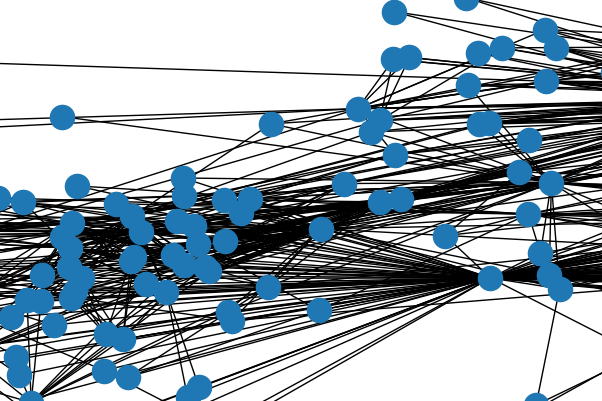

In [48]:
%matplotlib notebook
nx.draw(G2)

In [99]:
# for i in range(d.shape[0]):
#     print(np.nanargmin(d[i,:]), np.nanmin(d[i,:]))

# Check the distance calculation

In [70]:
f0 = np.array(all_tracklet_features[0])
f1 = np.array(all_tracklet_features[1])

In [71]:
f0.shape, f1.shape

((63, 22), (36, 22))

In [88]:
dist_opt = {'check_distance_early':True,
                'max_distance':100.0,
                'use_cdist':True}
# dist, pairwise_dist = calc_feature_dist(f0, f1, **dist_opt)
# dist
all_pairwise_dist = cdist(f0,f1, metric='euclidean')
all_pairwise_dist.shape

(63, 36)

In [89]:
f01_dist = np.min(all_pairwise_dist, axis=1)
f01_dist.shape

(63,)

In [91]:
final_dist = np.mean(f01_dist)
final_dist

144058.29358976817

In [105]:
V = np.var(np.vstack([f0, f1]), axis=0, ddof=1)
V.shape

(22,)

In [138]:
i0 = 0
f0 = np.array(all_tracklet_features[i0])
all_v01, all_v10, all_d01, all_d10 = [], [], [], []
for i in range(len(all_tracklet_features)):
    if i==i0:
        continue
    f1 = np.array(all_tracklet_features[i])
#     V = np.var(np.vstack([f0, f1]), axis=0, ddof=1) # Only do variance of f0
    V01 = np.var(f0, axis=0, ddof=1) # Only do variance of f0
    V10 = np.var(f1, axis=0, ddof=1) # Only do variance of f0
#     all_v01.append(np.mean(V01))
#     all_v10.append(np.mean(V10))
    
    all_pairwise_dist = cdist(f0,f1, metric='seuclidean', V=V01)
    f01_dist = np.min(all_pairwise_dist, axis=1)
    all_d01.append(np.mean(f01_dist))
    all_v01.append(np.std(f01_dist))
    
    all_pairwise_dist = cdist(f0,f1, metric='seuclidean', V=V10)
    f10_dist = np.min(all_pairwise_dist, axis=1)
    all_d10.append(np.mean(f10_dist))
    all_v10.append(np.std(f10_dist))

#     dist, pairwise_dist = calc_feature_dist(f0, f1, **dist_opt)
#     all_d.append(np.mean(f01_dist))
#     print(dist)
#     print()

<IPython.core.display.Javascript object>


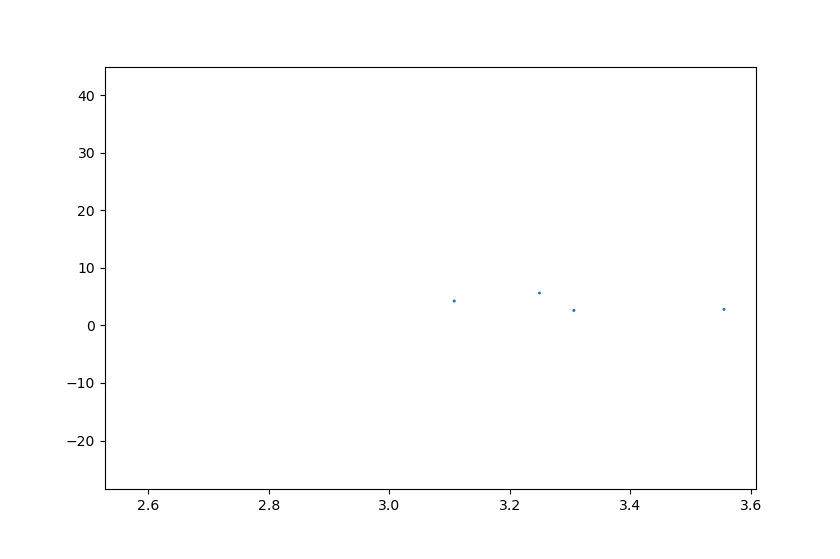

In [147]:
# plt.plot(np.log(np.array(all_d)), all_v, 'o')
# plt.xlabel('Distance')
# plt.ylabel('Mean feature variance')
plt.scatter(all_d01, all_d10, s=np.array(all_v01))

In [181]:
i0 = 0
f0 = np.array(all_tracklet_features[i0])
all_v01, all_v10, all_d01, all_d10 = [], [], [], []
for i in range(len(all_tracklet_features)):
    if i==i0:
        continue
    f1 = np.array(all_tracklet_features[i])
    
    CV01 = np.linalg.inv(np.cov(f0.T)).T # Only do variance of f0
    all_pairwise_dist = cdist(f0,f1, metric='mahalanobis')#, VI=CV01)
    f01_dist = np.min(all_pairwise_dist, axis=1)
    all_d01.append(np.mean(f01_dist))
    all_v01.append(CV01)
#     all_v01.append(np.std(f01_dist))


ValueError: The number of observations (13) is too small; the covariance matrix is singular. For observations with 13 dimensions, at least 14 observations are required.

In [180]:
all_pairwise_dist

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])